In [1]:
#EP Phys 512
#Problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#PART A
#INSERT SCANNED PDF OF ANSWERS

#dish_zenith.txt are (x,y,z) in mm of targets on a dish, oriented in +z direction
#rotationally symmetric paraboloid: z-z0 = a((x-x0)**2 + (y-y0)**2)
#solve for: x0, y0, z0, a

#make into linear equation:
#z = c1 + c2*x + c3*y + c4*(x**2 + y**2)

(475,)
(475, 4)
shape of lhs is now   (4, 4)
coefficients are : [-1.51231182e+03  4.53599028e-04 -1.94115589e-02  1.66704455e-04]
(475,)


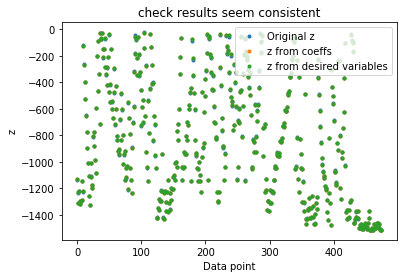

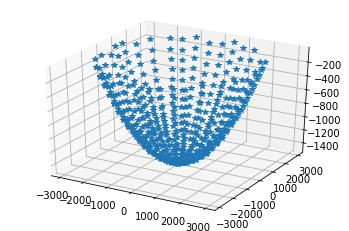

BEST FIT PARAMETERS ARE: 
 a:  0.00016670445477401385 
 z0:  -1512.8772100367896 
 x0:  -1.3604886221979806 
 y0:  58.221476081578544


In [4]:
#read in data
num_coeffs = 4

data = np.genfromtxt('dish_zenith.txt') #(x,y,z) in mm
x = data[:, 0] #name individually to make code more readable
y = data[:, 1]
z = data[:, 2]
print(x.shape)


#set up matrix A
A = np.zeros((len(x), num_coeffs))
print(A.shape)
A[:, 0] = 1 #constant term
A[:, 1] = x
A[:, 2] = y
A[:, 3] = x**2 + y**2

#ignore noise for now: c = inv(A^TA)(A^Tz)
lhs = np.dot(A.transpose(), A)
print('shape of lhs is now  ', lhs.shape)
rhs = np.dot(A.transpose(), z)
coeffs = np.dot(np.linalg.inv(lhs), rhs)
print('coefficients are :', coeffs)

#regain the desired variables from the linearized coefficients
a = coeffs[3]
y0 = coeffs[2]/(-2*a)
x0 = coeffs[1]/(-2*a)
z0 = coeffs[0] - a*x0**2 - a*y0**2

#recover z using fit coefficients
z_test = np.dot(A, coeffs)
print(z_test.shape)

#recover z using desired variables
z_test2 = z0 + a*( (x-x0)**2 + (y-y0)**2 )

#sanity check
mpl.figure()
mpl.title('check results seem consistent')
mpl.ylabel('z')
mpl.xlabel('Data point')
mpl.plot(z, '.')
mpl.plot(z_test, '.')
mpl.plot(z_test2, '.')
mpl.legend(['Original z', 'z from coeffs', 'z from desired variables'])
mpl.show()

mpl.figure()
# Axes3D.plot(x, y, z)
ax = mpl.axes(projection='3d')
ax.plot3D(x, y, z, '*')
mpl.show()



print('BEST FIT PARAMETERS ARE: \n a: ', a, '\n z0: ', z0, '\n x0: ', x0, '\n y0: ', y0)

Estimate of noise  3.7683386487847446


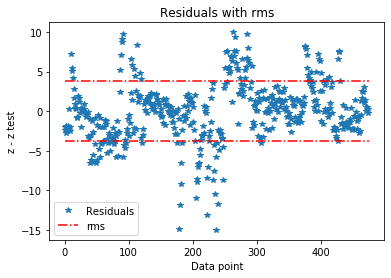

The focal length f is  1499.6599841252137  mm
The error is  -8.410336465345445  mm


In [14]:
#PART C

#estimate noise on data
rms = np.std(z-z_test2)
print('Estimate of noise ', rms)

mpl.figure()
mpl.plot(z-z_test2, '*')
mpl.plot([0, len(z)], [rms, rms], 'r-.')
mpl.plot([0, len(z)], [-1*rms, -1*rms], 'r-.')
mpl.title('Residuals with rms')
mpl.ylabel('z - z test')
mpl.xlabel('Data point')
mpl.legend(['Residuals', 'rms'])
mpl.show()

#note that it looks kind of correlated but it's being plotted against data points
#shows no actual correlation to x or y


f = 1/(4*a)
#ferr = f*(sigs[3]/a) #fractional error propagation
#sigs = np.diag(np.sqrt( np.linalg.inv( np.dot(A.transpose(), A) ) ))
#print(np.sqrt( np.linalg.inv( np.dot(A.transpose(), A) ) ) )
#a is the last coefficient. that's the estimated error.

ferr = rms / np.average(z - z0) * (-1*f) #take first order approximation on error
#is averaging z okay?? seems super janky!!!

print('The focal length f is ', f, ' mm')
print('The error is ', ferr, ' mm')